In [2]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [31]:
year = '2016'

hists1 = load('v2/doublebSF'+year+'.scaled')
hists2 = load('v2_signal_fjpt170/doublebSF'+year+'_signal.scaled')
hists3 = load('v2_signal_fjpt250/doublebSF'+year+'_signal.scaled')

gentype_map = {
    'bb':       0,
    'b':        1,
    'cc' :      2,
    'c':        3,
    'other':    4
}

category_map = {
        "pass": 1,
        "fail": 0
        }

In [32]:
bkg = hists1['bkg']
sigpt170 = hists2['sig']
sigpt250 = hists3['sig']

In [ ]:
sigpt170['template']

In [ ]:
#### 2016 Rebinning test
#pass_binning = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 2.5]
#bkg["template"] = bkg["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", pass_binning))

fail_binning = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5]
data["template"] = data["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", fail_binning))
bkg["template"] = bkg["template"].rebin("btagJP", hist.Bin("btagJP", "btagJP", fail_binning))
data['template'].sum('')

In [ ]:
data['template'].sum('process', 'gentype', 'ZHbbvsQCD', overflow='all').axis('btagJP').edges()

In [ ]:
#### QCD cutflow
bkg['cutflow'].sum('cut', 'process', overflow='all').values()

In [ ]:
#### data cutflow
data['cutflow'].sum('cut', 'process', overflow='all').values()

In [ ]:
#### yields by splitting gentype and dark Higgs pass/fail tagger (QCD)
gentype_names = ['bb', 'b', 'cc', 'c', 'other']
step1 = bkg['template'].sum('process', overflow='all')
for i in range(5):
    step2 = step1.integrate('gentype', i).values()
    print(gentype_names[i], 'fail:', step2[()][:,0].sum(), '/', gentype_names[i], 'pass:', step2[()][:,1].sum())

In [ ]:
#### yields by splitting dark Higgs pass/fail tagger (BTagMu data)
step1 = data['template'].sum('process', 'gentype', overflow='all').values()
print('fail:', step1[()][:,0].sum(), '/ pass:', step1[()][:,1].sum())

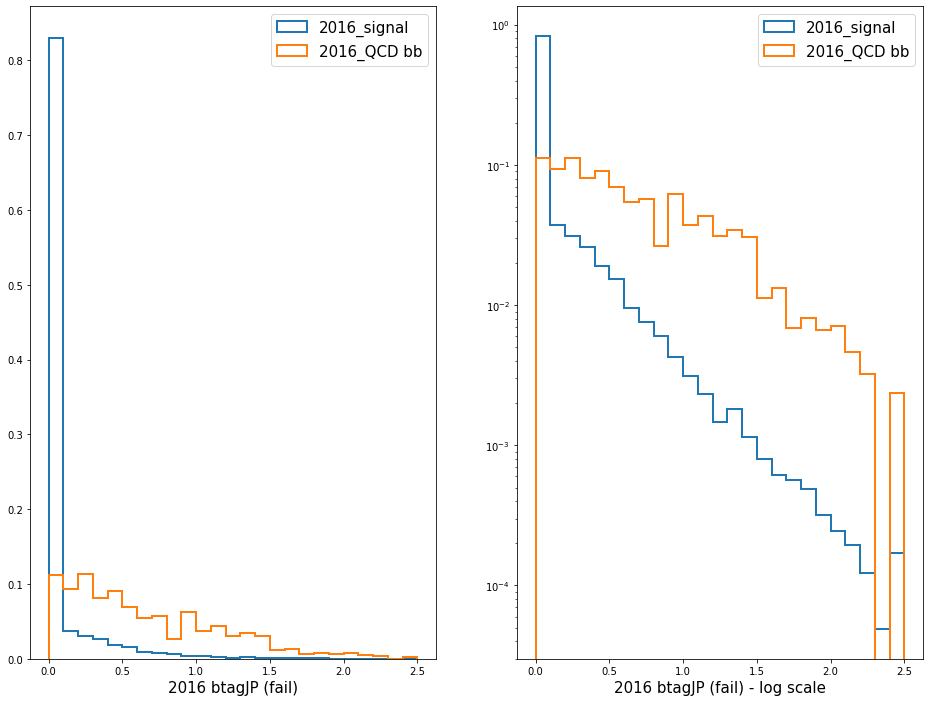

In [34]:
fail2016 = [0, 0.53]
pass2016 = [0.53, 1]

fail2017 = [0, 0.61]
pass2017 = [0.61, 1]

fail2018 = [0, 0.65]
pass2018 = [0.65, 1]

hbkg ={}
hsig1 = {}
hsig2 = {}
names = ['bb', 'b', 'cc', 'c', 'others']

if year == '2016':
    hbkg['fail'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
    hsig1['fail'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
    hsig2['fail'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2016))
    
    hbkg['pass'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    hsig1['pass'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    hsig2['pass'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2016))
    
elif year == '2017':
    hbkg['fail'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
    hsig1['fail'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
    hsig2['fail'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2017))
    
    hbkg['pass'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))
    hsig1['pass'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))
    hsig2['pass'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2017))

else:
    hbkg['fail'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
    hsig1['fail'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))
    hsig2['fail'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', fail2018))

    hbkg['pass'] = bkg['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))
    hsig1['pass'] = sigpt170['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))
    hsig2['pass'] = sigpt250['template'].rebin('ZHbbvsQCD',hist.Bin('ZHbbvsQCD','ZHbbvsQCD', pass2018))

x_bins = np.linspace(0.0, 2.5, num=25)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12), sharex=True)
#print(bkg_fail.sum('process','ZHbbvsQCD'))
#print(data_fail.sum('gentype', 'process','ZHbbvsQCD'))

cate = 'fail'

### Draw QCD per gentype
tot = hsig1[cate].sum('process','ZHbbvsQCD').values()[()][0].sum()
temp = hsig1[cate].sum('process','ZHbbvsQCD').values()[()][0]/tot
ax1.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=year+'_signal')
ax2.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=year+'_signal')
    

for i in range(1):
    tot = hbkg[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    temp = hbkg[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot
    ax1.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=year+'_QCD bb')
    ax2.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=year+'_QCD bb')
    
    #tot = hsig1[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    #temp = hsig1[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot
    #ax1.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label='signal fj pt > 170 '+names[i])
    #ax2.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label='signal fj pt > 170 '+names[i])
    
    #tot = hsig2[cate].sum('process','ZHbbvsQCD').values()[()][i].sum()
    #temp = hsig2[cate].sum('process','ZHbbvsQCD').values()[()][i]/tot
    #ax1.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label='signal fj pt > 250 '+names[i])
    #ax2.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label='signal fj pt > 250 '+names[i])
    
    ax1.set_xlabel(year+' btagJP ('+cate+')', fontsize=15)
    ax2.set_xlabel(year+' btagJP ('+cate+') - log scale', fontsize=15)
    
ax1.legend(fontsize=15, loc='best')
ax2.legend(fontsize=15, loc='best')

### Log scale for ax2 hist
ax2.set_yscale('log')

fig.savefig('v2_signal_fjpt170/btagJP_'+year+'_'+cate+'.png')

ZHbbvsQCD
btagJP
tau21
fjmass
fj1pt


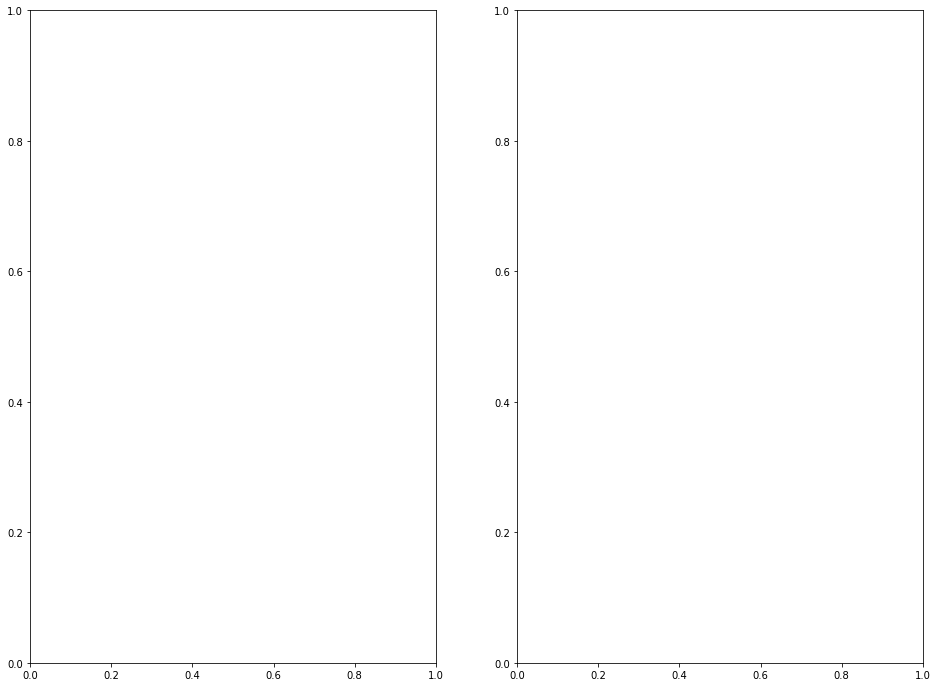

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,12), sharex=True)

for key in bkg.keys():
    if key == 'sumw': continue
    if key == 'cutflow': continue
    if key == 'template': continue
    if key == 'btagJP': continue
        
    if key == 'fjmass':
        x_bins = np.linspace(0.0, 300, num=30)
    elif key == 'tau21':
        x_bins = np.linspace(0.0, 1.0, num=20)
    elif key == 'ZHbbvsQCD':
        x_bins = np.linspace(0.0, 1.0, num=15)
    #elif key == 'btagJP':
    #    x_bins = np.linspace(0.0, 2.5, num=25)
    elif key == 'fj1pt':
        x_bins = np.array([370.0, 400.0, 430.0, 470.0, 510.0, 550.0, 590.0, 640.0, 690.0, 740.0, 790.0, 840.0, 900.0, 960.0, 1020.0, 1090.0, 1160.0, 1250.0])
    
    print(key)
    
    #### Draw QCD
    for i in range(1):        
        tot = bkg[key].sum('process').values()[()][i].sum()        
        w = bkg[key].sum('process').values()[()][i]/tot
        
        ax1.hist(x_bins, bins=x_bins.size, weights=w, histtype='step', lw=2, label=year+'_QCD bb')        
        ax2.hist(x_bins, bins=x_bins.size, weights=w, histtype='step', lw=2, label=year+'_QCD bb')
        
        tot = sigpt170[key].sum('process').values()[()][i].sum()        
        w = sigpt170[key].sum('process').values()[()][i]/tot
        
        ax1.hist(x_bins, bins=x_bins.size, weights=w, histtype='step', lw=2, label=year+'_signal')        
        ax2.hist(x_bins, bins=x_bins.size, weights=w, histtype='step', lw=2, label=year+'_signal')
        
        ax1.set_xlabel(key, fontsize=15)
        ax2.set_xlabel(key+' - log scale', fontsize=15)

        ax1.legend(fontsize=15, loc='best')
        ax2.legend(fontsize=15, loc='best')
        
        ax2.set_yscale('log')
        fig.savefig('v2_signal_fjpt170/'+key+'_'+year+'.png')

        ax1.cla()
        ax2.cla()

In [ ]:
### one figure per one gentype

plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})


x_bins = np.linspace(0.0, 2.5, num=25)
names = ['bb', 'b', 'cc', 'c', 'others']
key = 'btagJP'

for i in range(5):

    fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10,12),
    sharex=True
    )
    

    tot = bkg[key].sum('process').values()[()][i].sum()
    if tot == 0: continue
    temp = bkg[key].sum('process').values()[()][i]/tot
    plt.hist(x_bins, bins=x_bins.size, weights=temp, histtype='step', lw=2, label=names[i])
    ax.set_xlabel(key, fontsize=15)
    ax.legend(fontsize=15)
    #fig.savefig(key+'_QCD_'+names[i]+'.png')

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10,12),
    sharex=True
)

hist.plot1d(sig['btagJP'].sum('gentype'), overlay='process')
x_bins = np.linspace(0.0, 1.0, num=25)

print(x_bins.size)

names = ['bb', 'b', 'cc', 'c', 'others']

for i in range(5):
    tot = bkg['btagJP'].sum('process').values()[()][i].sum()
    if tot == 0: continue
    temp = bkg['btagJP'].sum('process').values()[()][i]/tot
    plt.hist(x_bins, bins=25, weights=temp, histtype='step', lw=2, label=names[i])


ax.set_ylim(0.001, 0.5)
ax.set_yscale('log')
ax.legend(fontsize=11)
#fig.savefig('btagJP.png')

In [ ]:
########################### Signal ###########################
hist_sig = load('doublebSFsignal.scaled')

sig = hist_sig['sig']
category_map = {
        "pass": 1,
        "fail": 0
        }

In [ ]:
for key in sig.keys():
    if key == 'sumw' or key == 'template' or key == 'cutflow': continue
    for ipro in sig[key].identifiers('process'):
        yld = sig[key].integrate('process', ipro).sum('gentype', key, overflow='all').values()[()]
        print(ipro, key, yld)
        sig[key].scale({ipro:1./yld},axis='process')

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

for key in sig.keys():
    if not (key == 'btagJP' or key == 'ZHbbvsQCD'): continue
    #if key == 'sumw' or key == 'cutflow' or key == 'template': continue
        
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(10,10),
        sharex=True
    )
        
    hist.plot1d(sig[key].sum('gentype', overflow='all'), overlay='process')
    #ax.legend(fontsize=12)
    #ax.get_legend().remove()
    if key == 'fj1pt':
        ax.set_ylim(0.01, 0.1)
        #ax.set_yscale('log')
    #fig.savefig(key+'_signal.png')